In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
pd.set_option('display.mpl_style', 'default')

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
weather_2012 = pd.read_csv('pandas-cookbook/data/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


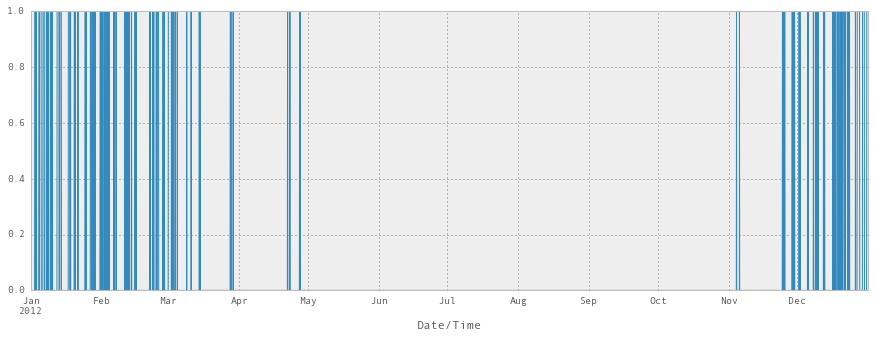

In [3]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing.plot(figsize=(15,5))

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


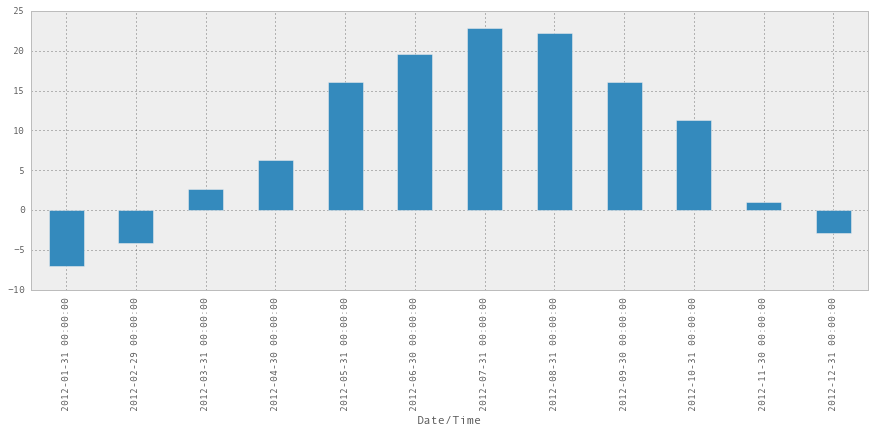

In [5]:
import numpy as np
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar', figsize=(15,5))

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


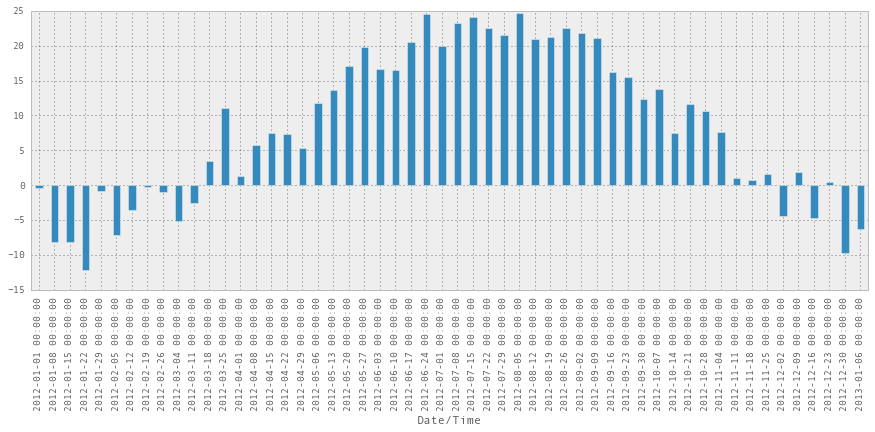

In [9]:
weather_2012['Temp (C)'].resample('W', how=np.median).plot(kind='bar', figsize=(15,5))

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


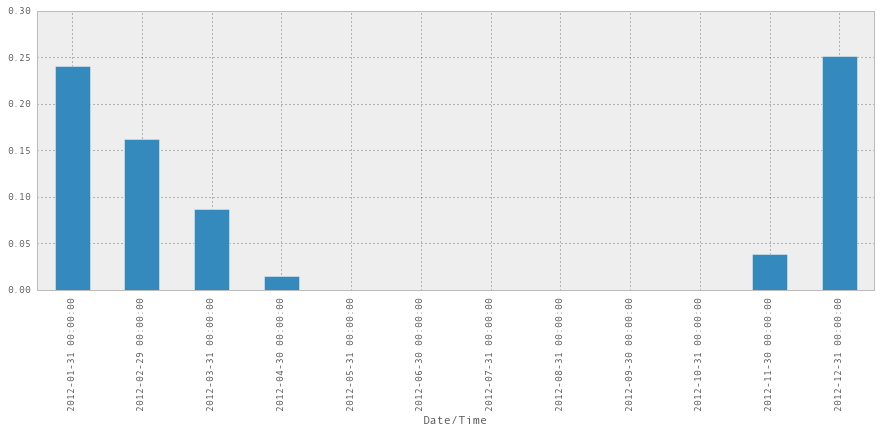

In [11]:
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar', figsize=(15,5))

In [15]:
temperature = weather_2012['Temp (C)'].resample('M').apply(np.median)
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)
temperature.name = "Temperature"
snowiness.name = "Snowiness"

In [19]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10da3ed90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10dc831d0>], dtype=object)

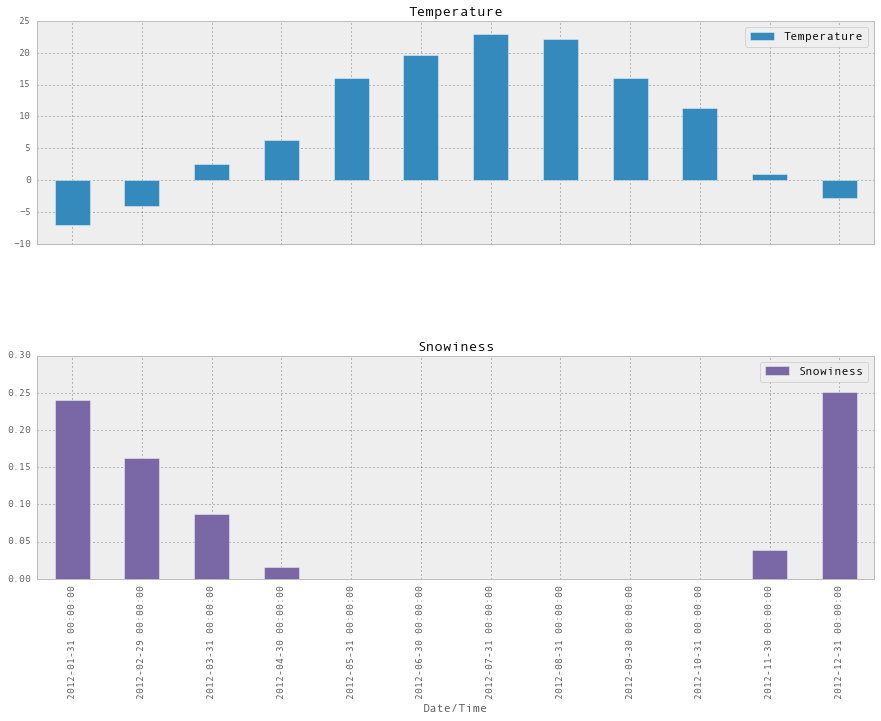

In [24]:
stats.plot(kind='bar', figsize=(15,10), subplots=True)